# 전이학습
- 다른 Task 에서 대량의 데이터로 학습된 모델의 가중치를 활용하여 비슷한 다른 Task에 적용하여 모델 성능을 향상시키는 학습 방법
- Pre-training
    - Pre-training(사전학습)이란 모델을 바로 주어진 문제에 학습시키기 이전에 아주 많은 데이터셋으로 먼저 학습을 시키는 것을 말함
    - 사전 학습된 모델의 parameter를 이용해서 모델을 initialize한 뒤, 실제 풀려고 하는 문제의 데이터로 학습을 하게 되면 임의로 initialize된 parameter를 가진 모델을 처음부터 학습시키는 것 보다 더 높은 성능을 보여줌




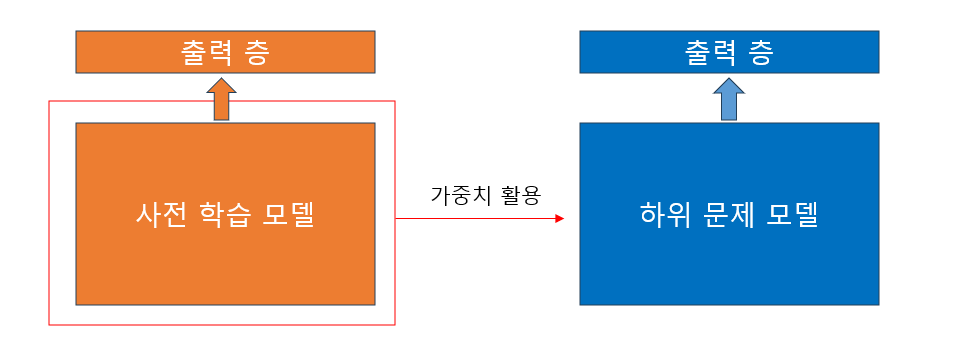

## 일반적으로 합성곱 신경망 기반 모델들은 두가지 파트로 구성
- Feature extractor
    - 합성곱층과 풀링층으로 구성
- Classifier
    - 주로 Fully-connected 레이어로 구성


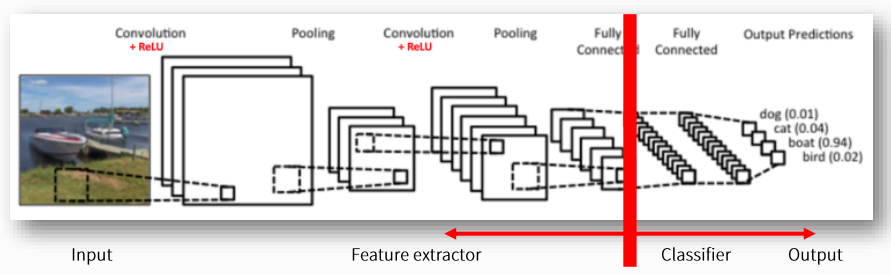

## 합성곱 신경망 학습에 특징
- input 에 가까운 부분은 일반적인 특징을 추출하도록 학습된다.
- output 에 가까워 질수록 특정 문제 혹은 데이터셋에서만 나타나는 구체적인 특징을 추출하도록 학습된다.


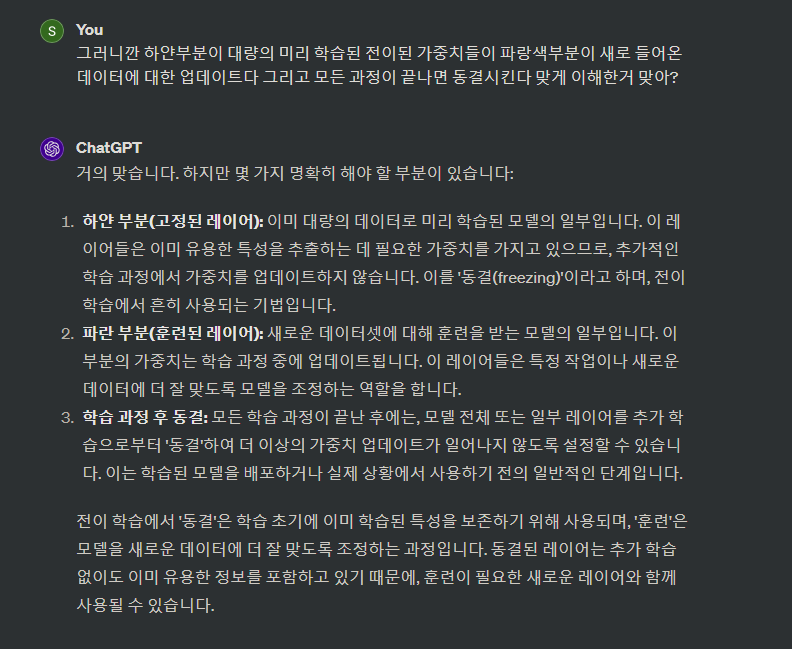

## 미세 조정(Fine-tuning)
- 딥 러닝에서 미세조정은 사전 훈련된 모델의 가중치가 새로운 데이터에 대해 훈련되는 전이 학습에 대한 접근 방식
- 사전학습 된 모델에 추가로 개별과제의 맞는 새로운 레이어를 추가하여 이미 학습된 모델의 가중치 전체 또는 일부를 미세하게 조정하는 학습 방법




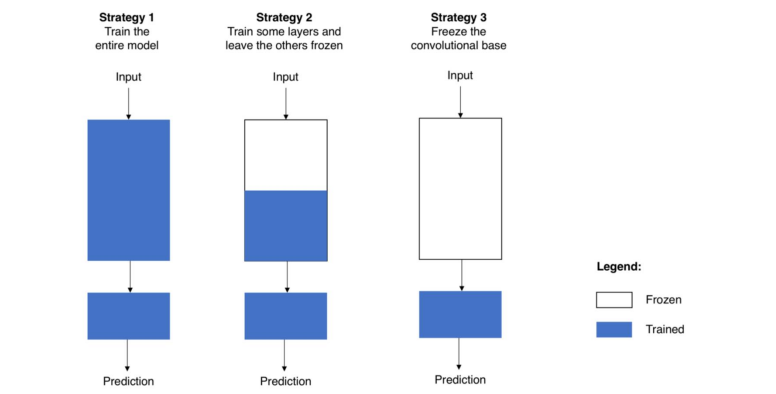

## VGG
- 옥스포트 대학의 연구팀 VGG(Visual Geometry Group)에 의해 개발된 모델로써, 2014년 이미지넷 이미지 인식 대회에서 준우승을 한 모델  
- 1등을 한 GoogleNet보다 단순하면서 성능은 거의 차이가 나지 않은 VGG가 주목을 많이 받았음


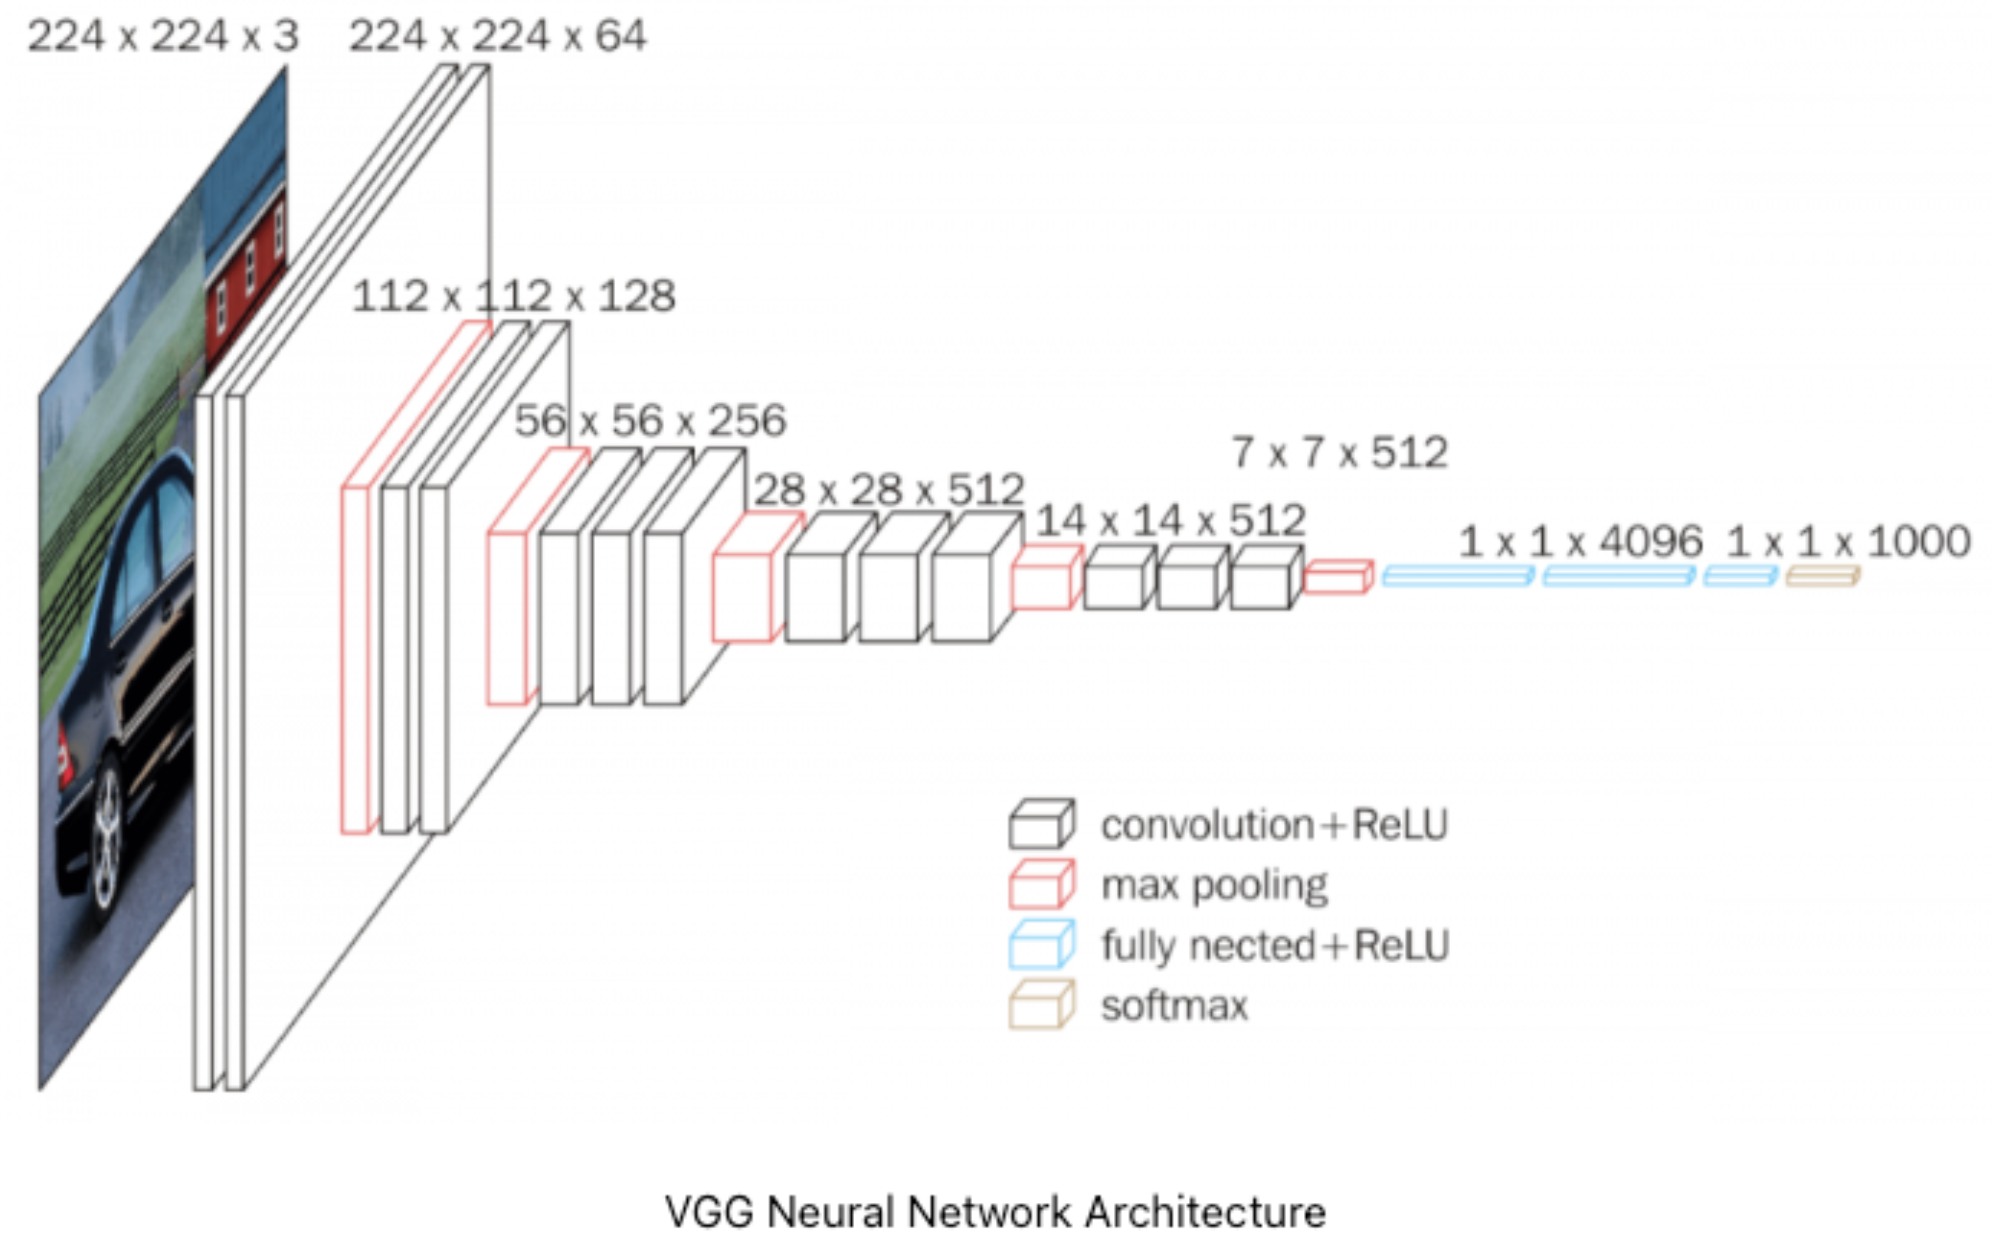

## ResNet
- Residual neural network의 줄임말로 마이크로소프트에서 개발한 알고리즘으로써 2015년 이미지넷 이미지 인식 대회에서 우승을 한 모델
- VGG에 경우 신경망이 깊어지면 Vanishing gradient 문제가 발생
- Vanishing gradient 문제를 해결한 모델
- 신경망 깊이를 152층 레이어까지 늘림(나중에는 1001층의 레이어까지 설계)

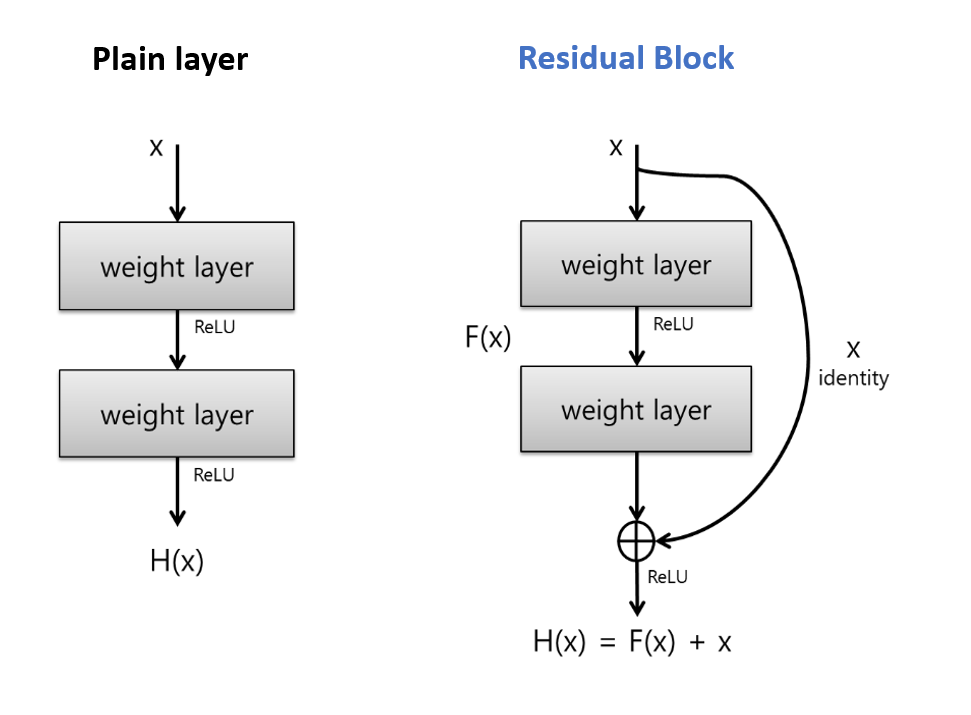

- Bottleneck

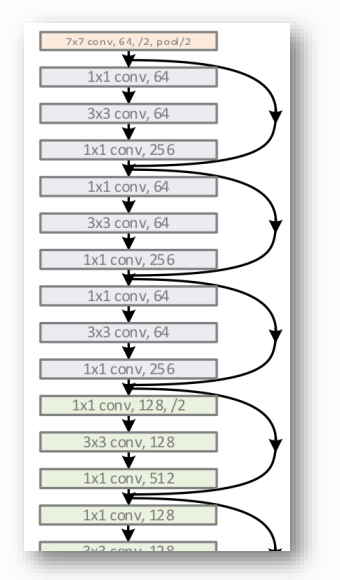

# 재현성 함수

In [1]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os
from PIL import Image

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd()
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
from glob import glob

lst = glob(DATA_PATH+"/data/cats_and_dogs/train/cats/*.jpg") # 고양이 이미지 파일 경로를 담은 리스트
cats_list = sorted(lst, key = lambda x: x) # 파일 경로명으로 정렬

lst = glob(DATA_PATH+"/data/cats_and_dogs/train/dogs/*.jpg") # 고양이 이미지 파일 경로를 담은 리스트
dogs_list = sorted(lst, key = lambda x: x) # 파일 경로명으로 정렬

len(cats_list), len(dogs_list)

(1000, 1000)

In [3]:
labels = [0] * len(cats_list) + [1] * len(dogs_list) # 정답데이터 만들기
img_path = cats_list + dogs_list # 고양이와 개 이미지 파일 경로 합치기

len(labels), len(img_path)

(2000, 2000)

In [4]:
# 멀티 인덱싱을 위해 ndarray 로 변환
train = np.array(img_path)
target = np.array(labels)

np.random.seed(SEED) # 동일한 shuffle 위해 시드 고정

# 인덱스를 이용하여 섞기 위해 샘플 개수 만큼 인덱스 생성
index_arr = np.arange(train.shape[0])

# 섞기
np.random.shuffle(index_arr)
np.random.shuffle(index_arr)

# shuffle 된 인덱스를 이용하여 샘플 섞기
train = train[index_arr]
target = target[index_arr]

- pytorch 사전학습 모델 가중치 링크
    - https://pytorch.org/vision/stable/models.html

In [5]:
from torchvision.models import resnet50, ResNet50_Weights

In [6]:
ResNet50_Weights.IMAGENET1K_V2

ResNet50_Weights.IMAGENET1K_V2

```
 followed by a central crop of crop_size=[224].
 Finally the values are first rescaled to [0.0, 1.0]
 and then normalized using mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225].
```

In [7]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
model.layer1

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [9]:
model.layer1[0]

Bottleneck(
  (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (downsample): Sequential(
    (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)

In [10]:
model.layer1[0].conv1

Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)

In [12]:
for name, param in model.conv1.named_parameters():
    print(f"{name}: {param},{param.shape}") # 학습된 가중치들

weight: Parameter containing:
tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
           -2.0325e-02,  8.8140e-03],
          [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
            2.9346e-02, -5.8331e-02],
          [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
            2.1868e-01, -7.2909e-02],
          ...,
          [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
           -5.7855e-01,  2.2461e-01],
          [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
           -4.9317e-02, -6.8082e-02],
          [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
            1.8976e-01, -2.2302e-02]],

         [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
           -6.5541e-02,  1.6895e-02],
          [-3.3543e-02,  3.9067e-02,  8.6565e-02,  ...,  1.1713e-01,
            2.1848e-02, -4.4082e-02],
          [ 5.5285e-02, -2.6424e-01,  4.2687e-01,  ..., -2.3723e-01,
            3.2017e-01, -1.1

In [11]:
model.fc = torch.nn.Linear(2048, 1)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# 학습및 예측용 transform 객체 만들기
mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]

In [12]:
from torchvision import transforms

lst = [
    transforms.Resize([224,224]), # 사전학습 모델의 input 이미지 사이즈에 맞춰서 리사이징
    transforms.ToTensor(), # C, H, W 순서와  0~1범위로 스케일링
    transforms.Normalize( [0.485, 0.456, 0.406] , [0.229, 0.224, 0.225] ) # 사전학습 모델이 사용한 평균과 표준편차로 정규화
]
train_transform = transforms.Compose(lst)


lst = [
    transforms.Resize([224,224]), # 사전학습 모델의 input 이미지 사이즈에 맞춰서 리사이징
    transforms.ToTensor(), # C, H, W 순서와  0~1범위로 스케일링
    transforms.Normalize( [0.485, 0.456, 0.406] , [0.229, 0.224, 0.225] ) # 사전학습 모델이 사용한 평균과 표준편차로 정규화
]
test_transform = transforms.Compose(lst)

# 데이터셋 클래스

In [15]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self,transform, x, y = None):
        self.transform = transform
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)

    def __getitem__(self,idx):
        item = {}
        x = Image.open(self.x[idx]) # 필로우 이미지 객체 반환
        item["x"] = self.transform(x) # 텐서로 변환
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx]) # 텐서로 변환
        return item

In [16]:
target = target.reshape(-1,1)
target.shape,target.dtype

((2000, 1), dtype('int32'))

In [19]:
dataset=CatDogDataset(train,target)
dl=torch.utils.data.DataLoader(dataset,shuffle=False)
dl

# 모델 만들기

In [20]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.pre_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2) # 사전학습 모델 가중치와 함께 객체 생성
        self.pre_model.fc = torch.nn.Linear(2048, 1) # 우리가 풀고자 하는 문제에 맞게 output layer 교체

    def forward(self, x):
        return self.pre_model(x)

In [21]:
class FreezNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.pre_model = resnet50(weights= ResNet50_Weights.IMAGENET1K_V2)
        for param in self.pre_model.parameters():
            param.requires_grad = False # 가중치 업데이트 안함.

        self.pre_model.fc = torch.nn.Linear(2048, 1)

    def forward(self, x):
        return self.pre_model(x)
    

FreezNet()

FreezNet(
  (pre_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

# 학습 loop 함수

In [22]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드
    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        loss = loss_fn( pred, batch["y"].to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    epoch_loss /= len(dataloader)
    return epoch_loss

# 테스트 및 검증 loop 함수

In [26]:
@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    epoch_loss = 0
    pred_list = []
    act_func = torch.nn.Sigmoid()
    model.eval() # 평가 모드

    for batch in dataloader:
        pred = model( batch["x"].to(device) )

        if batch.get("y") is not None:
            loss = loss_fn( pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act_func(pred) # logit 값을 확률로 변환
        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환
        pred_list.append(pred)
        
    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

# 하이퍼 파라미터

In [23]:
n_splits = 5
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [24]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

In [25]:
dt=CatDogDataset(train_transform, train, target)
dl=torch.utils.data.DataLoader(dt,batch_size=4,shuffle=False)
next(iter(dl))

{'x': tensor([[[[ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           ...,
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489],
           [ 2.2489,  2.2489,  2.2489,  ...,  2.2489,  2.2489,  2.2489]],
 
          [[ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           ...,
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286],
           [ 2.4286,  2.4286,  2.4286,  ...,  2.4286,  2.4286,  2.4286]],
 
          [[ 2.6400,  2.6400,  2.6400,  ...,  2.6400,  2.6400,  2.6400],
        

In [27]:
from torch.utils.data import Dataset, DataLoader

data_set = CatDogDataset(test_transform, train)
test_dl = DataLoader(data_set, batch_size=4, shuffle=False)

# 모델 인스턴스 생성 및 평가 모드로 전환
model = FreezNet()
model.eval()

# GPU로 모델 이동 (가능한 경우)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


pred_list = []
for i in range(n_splits):
    model = Net().to(device)
    _, pred = test_loop(test_dl, model, loss_fn, device)

    pred_list.append(pred)

pred = np.mean(pred_list, axis=0)
pred.shape


(2000, 1)

In [28]:
pred=(pred>0.5).astype('int')
pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [29]:
pred,target

(array([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [1]]),
 array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [1]]))

In [30]:
accuracy_score(target, pred)

0.5685

# 동결(Freezing)


## 전체 동결

In [31]:
class FreezNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.pre_model = resnet50(weights= ResNet50_Weights.IMAGENET1K_V2)
        for param in self.pre_model.parameters():
            param.requires_grad = False # 가중치 업데이트 안함.

        self.pre_model.fc = torch.nn.Linear(2048, 1)

    def forward(self, x):
        return self.pre_model(x)

In [32]:
model = FreezNet()

for name, param in model.named_parameters():
    print(name, param.requires_grad)

pre_model.conv1.weight False
pre_model.bn1.weight False
pre_model.bn1.bias False
pre_model.layer1.0.conv1.weight False
pre_model.layer1.0.bn1.weight False
pre_model.layer1.0.bn1.bias False
pre_model.layer1.0.conv2.weight False
pre_model.layer1.0.bn2.weight False
pre_model.layer1.0.bn2.bias False
pre_model.layer1.0.conv3.weight False
pre_model.layer1.0.bn3.weight False
pre_model.layer1.0.bn3.bias False
pre_model.layer1.0.downsample.0.weight False
pre_model.layer1.0.downsample.1.weight False
pre_model.layer1.0.downsample.1.bias False
pre_model.layer1.1.conv1.weight False
pre_model.layer1.1.bn1.weight False
pre_model.layer1.1.bn1.bias False
pre_model.layer1.1.conv2.weight False
pre_model.layer1.1.bn2.weight False
pre_model.layer1.1.bn2.bias False
pre_model.layer1.1.conv3.weight False
pre_model.layer1.1.bn3.weight False
pre_model.layer1.1.bn3.bias False
pre_model.layer1.2.conv1.weight False
pre_model.layer1.2.bn1.weight False
pre_model.layer1.2.bn1.bias False
pre_model.layer1.2.conv2.weigh

## 일부 동결

In [33]:
pre_model = resnet50(weights = ResNet50_Weights.IMAGENET1K_V2)
pre_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
# 예를 들어 layer 2 까지 동결 시키고, layer 3 부터 학습 시키고 싶다면?
for name, param in pre_model.named_parameters():
    if name.startswith("layer3"):
        break
    param.requires_grad = False

In [35]:
class FreezNet2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.pre_model = resnet50(weights= ResNet50_Weights.IMAGENET1K_V2)
        
        for name, param in self.pre_model.named_parameters():
            if name.startswith("layer3"):
                break
            param.requires_grad = False # 가중치 업데이트 안함.

        self.pre_model.fc = torch.nn.Linear(2048, 1)

    def forward(self, x):
        return self.pre_model(x)

In [36]:
model = FreezNet2()
for name, param in model.named_parameters():
    print(name, param.requires_grad)

pre_model.conv1.weight False
pre_model.bn1.weight False
pre_model.bn1.bias False
pre_model.layer1.0.conv1.weight False
pre_model.layer1.0.bn1.weight False
pre_model.layer1.0.bn1.bias False
pre_model.layer1.0.conv2.weight False
pre_model.layer1.0.bn2.weight False
pre_model.layer1.0.bn2.bias False
pre_model.layer1.0.conv3.weight False
pre_model.layer1.0.bn3.weight False
pre_model.layer1.0.bn3.bias False
pre_model.layer1.0.downsample.0.weight False
pre_model.layer1.0.downsample.1.weight False
pre_model.layer1.0.downsample.1.bias False
pre_model.layer1.1.conv1.weight False
pre_model.layer1.1.bn1.weight False
pre_model.layer1.1.bn1.bias False
pre_model.layer1.1.conv2.weight False
pre_model.layer1.1.bn2.weight False
pre_model.layer1.1.bn2.bias False
pre_model.layer1.1.conv3.weight False
pre_model.layer1.1.bn3.weight False
pre_model.layer1.1.bn3.bias False
pre_model.layer1.2.conv1.weight False
pre_model.layer1.2.bn1.weight False
pre_model.layer1.2.bn1.bias False
pre_model.layer1.2.conv2.weigh

# 학습

In [83]:
is_holdout = False
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train) ):
    # 학습용 데이터
    x_train = train[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = CatDogDataset(train_transform, x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = CatDogDataset(test_transform, x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = FreezNet2().to(device)
    optimizer = torch.optim.Adam( model.parameters() )
    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm( range(epochs) ):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)
        pred = (pred > 0.5).astype(int) # 확률 -> 클래스 값
        score = accuracy_score(y_valid, pred)

        #print(train_loss, valid_loss, score)
        
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), os.path.join(DATA_PATH,'weight','cats_dogs',f"model_{i}(resnet).pth")) # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 50:
            break
    print(f"{i}번째 폴드 최고 정확도: {best_score}")
    best_score_list.append(best_score)
    if is_holdout:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 정확도: 0.9875


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 정확도: 0.9825


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 정확도: 0.9775


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 정확도: 0.985


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 정확도: 0.9875


In [85]:
np.mean(best_score_list)

0.984

In [86]:
target.shape

(2000, 1)

# 테스트 데이터 전처리

In [102]:
DATA_PATH=os.getcwd()+'/data/cats_and_dogs/'
DATA_PATH

'c:\\NLP_Papers_Review\\03_Deep_Learning/data/cats_and_dogs/'

In [103]:
cats_test_list = sorted(glob(DATA_PATH+"/test/cats/*.jpg"), key=lambda x: x )
dogs_test_list = sorted(glob(DATA_PATH+"/test/dogs/*.jpg"), key=lambda x: x )

len(cats_test_list), len(dogs_test_list)

(1000, 1000)

In [104]:
test_img_path = cats_test_list + dogs_test_list
test_labels = [0] * len(cats_test_list) + [1] * len(dogs_test_list)
len(test_img_path) , len(test_labels)

(2000, 2000)

# 테스트 데이터셋 생성

In [105]:
test = np.array(test_img_path)
y_test = np.array(test_labels)

test_dt = CatDogDataset(test_transform,test)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

# 테스트 데이터 예측

In [108]:
DATA_PATH='C:\\NLP_Papers_Review\\03_Deep_Learning\\weight\\cats_dogs'

In [109]:
pred_list = []
for i in range(n_splits):
    model = Net().to(device)
    state_dict = torch.load(os.path.join(DATA_PATH,f"model_{i}(resnet).pth"))
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, loss_fn, device)

    pred_list.append(pred)

pred = np.mean(pred_list, axis=0)
pred.shape

(2000, 1)

In [110]:
pred = (pred > 0.5).astype(int)

In [111]:
accuracy_score(y_test, pred)

0.9835